# Assignment 10
### Due July 4 at 12:00

**This notebook contains interactive widgets. 
They work on the standard editors *jupyter-notebook* and *jupyter-lab*, but we have no experience for other editors.**

Please note: 

- Read the instructions in the exercise PDF and in this notebook carefully.
- Add your solutions *only* at `YOUR CODE HERE`/`YOUR ANSWER HERE` and remove the corresponding `raise NotImplementedError()`.
- Do not chance the provided code and text, if not stated.
- Do not *add* or *delete* cells.
- Do not `import` additional functionality. 
- Before submitting: Please make sure, that your notebook can be executed from top to bottom `Menu -> Kernel -> Restart & Run all`. 

## Exercise 2: Similarity Graphs

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import interact, fixed
import ipywidgets as widgets

from numpy.testing import assert_equal, assert_almost_equal
from sklearn.datasets import make_moons
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns
import sklearn.neighbors
import scipy.sparse.csgraph

In [2]:
# Generate the two moons datasets
n_samples = 100
X_moons, y_moons = make_moons(n_samples=n_samples, noise=0, shuffle=False, random_state=42)
X_noisy_moons, y_noisy_moons = make_moons(n_samples=n_samples, noise=0.15, shuffle=False, random_state=42)

# Shuffle points inside each class
_ = np.random.shuffle(X_moons[:int(n_samples/2)]), np.random.shuffle(X_moons[int(n_samples/2):])
_ = np.random.shuffle(X_noisy_moons[:int(n_samples/2)]), np.random.shuffle(X_noisy_moons[int(n_samples/2):])

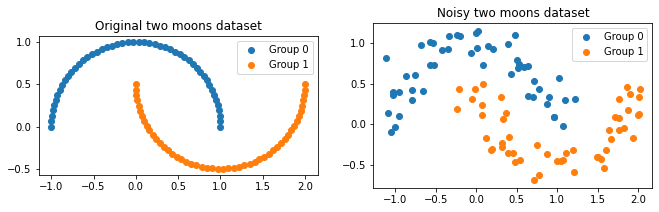

In [3]:
# Visualize the datasets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,5))
ax1.scatter(X_moons[y_moons==0, 0], X_moons[y_moons==0, 1], label='Group 0')
ax1.scatter(X_moons[y_moons==1, 0], X_moons[y_moons==1, 1], label='Group 1')
ax1.set_title('Original two moons dataset')
ax1.legend()
ax1.set_aspect('equal')

ax2.scatter(X_noisy_moons[y_noisy_moons==0, 0], X_noisy_moons[y_noisy_moons==0, 1], label='Group 0')
ax2.scatter(X_noisy_moons[y_noisy_moons==1, 0], X_noisy_moons[y_noisy_moons==1, 1], label='Group 1')
ax2.set_title('Noisy two moons dataset')
ax2.legend()
ax2.set_aspect('equal')

plt.show()

### (a) 
Implement  the  function `plot_similarities(X, sigma)` to  compute  the  paired  similarities with a Gaussian kernel and show them as a heat map.

In [4]:
def plot_similarities(X, sigma):
    ''' 
    Plot the paired similarities with a Gaussian kernel,
    by using a heat map.
        
    Parameters
    ----------
    X: input matrix
    sigma: kernel parameter
    '''
    
    # YOUR CODE HERE

    ax.set_title('Heatmap of similarity values')
    plt.gca().set_aspect('equal')
    #plt.show()

In [5]:
sigma_props = dict(min=-2, max=2, step=0.1, value=10**.5, continuous_update=False)

inter = interact(plot_similarities, X=fixed(X_moons), sigma=widgets.FloatLogSlider(**sigma_props));
inter = interact(plot_similarities, X=fixed(X_noisy_moons), sigma=widgets.FloatLogSlider(**sigma_props));

interactive(children=(FloatLogSlider(value=3.1622776601683795, continuous_update=False, description='sigma', m…

interactive(children=(FloatLogSlider(value=3.1622776601683795, continuous_update=False, description='sigma', m…

- **Which values of $\sigma$ would you choose, and why?**

    YOUR ANSWER HERE
    
    
- **What is the role of noise, how does it influence your choice of $\sigma$?**

    YOUR ANSWER HERE

### (b) 
Now implement the function `plot_graph(X, k, mutual)`, which uses `sklearn.neighbors.kneighbors_graph` to create a graph and plots the adjacency matrix. Based on the parameter `mutual`, the graph should be either symmetric or mutual.

In [6]:
def unbalanced_gaussian(n_samples = 100, n_dimension = 200, ratio=0.2):
    """ Generate unbalanced Gaussian dataset """
    n_class_0 = int(n_samples * ratio)

    png = np.random.RandomState(42)
    X_unb_gaussian = png.normal(0, .6, size=(n_samples, n_dimension))
    X_unb_gaussian[:n_class_0, :2] -= 1.1
    X_unb_gaussian[n_class_0:, :2] += 1.

    y_unb_gaussian = np.zeros((n_samples, ))
    y_unb_gaussian[:n_class_0] = 0
    y_unb_gaussian[n_class_0:] = 1
    
    return X_unb_gaussian, y_unb_gaussian

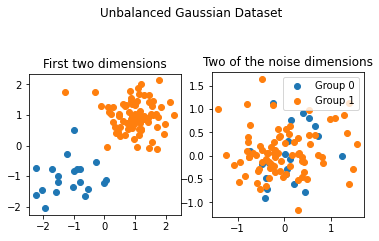

In [7]:
# Visualize the Gaussian datasets
X_unb_gaussian, y_unb_gaussian = unbalanced_gaussian(n_dimension=200)

plt.subplot(121, aspect='equal')
plt.scatter(X_unb_gaussian[y_unb_gaussian==0, 0], X_unb_gaussian[y_unb_gaussian==0, 1], label='Group 0')
plt.scatter(X_unb_gaussian[y_unb_gaussian==1, 0], X_unb_gaussian[y_unb_gaussian==1, 1], label='Group 1')
plt.title('First two dimensions')

plt.subplot(122, aspect='equal')
plt.scatter(X_unb_gaussian[y_unb_gaussian==0, 2], X_unb_gaussian[y_unb_gaussian==0, 3], label='Group 0')
plt.scatter(X_unb_gaussian[y_unb_gaussian==1, 2], X_unb_gaussian[y_unb_gaussian==1, 3], label='Group 1')
plt.title('Two of the noise dimensions')

plt.suptitle('Unbalanced Gaussian Dataset')
plt.legend()

plt.show()

In [8]:
def plot_graph(X, k=3, dim=2, mutual=False):
    ''' 
    Plot the adjacency matrix of a graph created 
    by using the function kneighbors_graph of sklearn.neighbors.
        
    Parameters
    ----------
    X: input matrix (n, d)
    k: number of neighbors for each sample
    dim: number of dimensions to use
    mutual: boolean parameter for choosing mutual kNN or symmetric kNN
    '''
    # A is the adjancency matrix (n, n)
    A = np.zeros((X.shape[0], X.shape[0]))
    X = X[:, :dim]
    
    # fill and plot adjacency matrix
    plt.subplot(121, aspect='equal')

    # YOUR CODE HERE
    
    n_connected, _ = scipy.sparse.csgraph.connected_components(A)
    if mutual:
        plt.title('Adjacency Matrix mutual')
    else:
        plt.title('Adjacency Matrix symmetric')

    # plot  connections
    plt.subplot(122, aspect='equal')
    for x, a in zip(X, A):
        for y in X[a.astype(bool)]:
            plt.plot([x[0], y[0]], [x[1], y[1]], c='r')
    plt.plot(X[:, 0], X[:, 1], '.', zorder=10)
    plt.title('#Connected Components: {}'.format(n_connected))
    if mutual:
        plt.suptitle('Mutual kNN Graph')
    else:
        plt.suptitle('Symmetric kNN Graph')
    
    #plt.show()

In [9]:
k_props = dict(min=1, max=50, continuous_update=False)
dim_props = dict(min=2, max=200, step=2, continuous_update=False)

interact(plot_graph, X=fixed(X_unb_gaussian), k=widgets.IntSlider(**k_props), dim=widgets.IntSlider(**dim_props), mutual=fixed(True));
interact(plot_graph, X=fixed(X_unb_gaussian), k=widgets.IntSlider(**k_props), dim=widgets.IntSlider(**dim_props), mutual=fixed(False));

interactive(children=(IntSlider(value=1, continuous_update=False, description='k', max=50, min=1), IntSlider(v…

interactive(children=(IntSlider(value=1, continuous_update=False, description='k', max=50, min=1), IntSlider(v…

<function __main__.plot_graph(X, k=3, dim=2, mutual=False)>

First use `dim=2`:

- **For $d=2$, what is the smallest $k$ for which the graph consists of a single connected component (answer separately for symmetric and mutual)**

    
YOUR ANSWER HERE
    
    
- **How do both graphs look like for small and high values of `k`?**

    
YOUR ANSWER HERE
    
Now increase `dim`:

- **What happens for $d=200$? Do you have a (theoretical) explanation for this effect?**

    
YOUR ANSWER HERE

### (c) 

At last, implement the function `plot_degree(X, k)`, which uses `sklearn.neighbors.kneighbors_graph` to create a graph and plots the degree of vertices in the graph.

In [10]:
def plot_degree(X, k=3, mutual='symmetric'):
    ''' 
    Plot the adjacency matrix of a graph created 
    by using the function kneighbors_graph of sklearn.neighbors.
        
    Parameters
    ----------
    X: input matrix
    k: number of neighbors for each sample
    mutual: parameter for choosing mutual kNN or symmetric kNN
    '''

    # YOUR CODE HERE
    
    plt.colorbar()
    plt.title('Degree per Point of {} kNN Graph'.format(mutual.capitalize()))
    plt.show()

In [11]:
k_props = dict(min=1, max=50, continuous_update=False)

interact(plot_degree, X=fixed(X_unb_gaussian[:, :2]),  mutual=fixed('mutual'), k=widgets.IntSlider(**k_props));
interact(plot_degree, X=fixed(X_unb_gaussian[:, :2]),  mutual=fixed('symmetric'), k=widgets.IntSlider(**k_props));

interactive(children=(IntSlider(value=1, continuous_update=False, description='k', max=50, min=1), Output()), …

interactive(children=(IntSlider(value=1, continuous_update=False, description='k', max=50, min=1), Output()), …

- **What do you think is the relation between vertex degrees in the k-nearest neighbor graph and the probability distribution from which the data was drawn?**

    
YOUR ANSWER HERE

## Exercise 3: Spectral Clustering

### (a)

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from numpy.testing import assert_equal, assert_almost_equal
from numpy.linalg import inv, eigh
from sklearn.cluster import KMeans
import scipy.io
from ipywidgets import interact, fixed
import ipywidgets as widgets


np.random.seed(42)

In [13]:
X = scipy.io.loadmat('clusterdata.mat')['X']

In [5]:
# YOUR CODE HERE
plt.title('3-means')
plt.show()



# YOUR CODE HERE
plt.title('2-means')
plt.show()



# YOUR CODE HERE
plt.title('4-means')
plt.show()

NameError: name 'plt' is not defined

### b)

In [15]:
def kneighbors_graph(X, num_neighbors):
    """ Generate k-neirest-neighbor graph
    
    Parameters
    ----------
    X: (n, d) numpy array
       Datapoints
    num_neighbors: int
       Number of nearest neighbors
       
    Returns
    -------
    W: (n, n) numpy array
        Adjacency matrix
    """

    # YOUR CODE HERE
    
    return W

In [16]:
# We define some points to test the kNN graph
X_test = np.array([[0, 0], 
                   [0, .2],
                   [1.5, 1],
                   [2, 1]])

assert_equal(kneighbors_graph(X_test, num_neighbors=2).shape, (4, 4))
assert_equal(kneighbors_graph(X_test, num_neighbors=3).shape, (4, 4))
assert_equal(np.unique(kneighbors_graph(X_test, num_neighbors=3)), [0, 1])
assert kneighbors_graph(X_test, num_neighbors=2).sum() < kneighbors_graph(X_test, num_neighbors=3).sum(),\
       "graph of k=3 should have more connections than k=2."

assert_equal(kneighbors_graph(X_test, num_neighbors=2),
             np.array([[0., 1., 1., 0.],
                       [1., 0., 1., 1.],
                       [1., 1., 0., 1.],
                       [0., 1., 1., 0.]]))

In [4]:
# plot a connected kNN graph
    
# YOUR CODE HERE

### c)

In [18]:
def spectral_cluster(W, k, normalize, regularization = 0):
    """ Spectral clustering algorithm
    
    Parameters
    ----------
    W: (n, n) numpy array
       Adjacency matrix
    k: int
       Number of cluster means
    normalise: bool
    regularization: float
        regularization of the adjacency
       
    Returns
    -------
    (X_embed, clustering, centers): (n, k), (n,), (k, k) numpy arrays
    """
    
    # YOUR CODE HERE

    return embedding, clustering, centers
    

In [19]:
# testing correctness
embedding, clustering, centers = spectral_cluster(kneighbors_graph(X_test, 2), 3, normalize=False)

assert_equal(embedding.shape, (4, 3))
assert_equal(clustering.shape, (4,))
assert_equal(centers.shape, (3, 3))
assert_equal(np.unique(clustering), [0, 1, 2])
assert_almost_equal(np.linalg.norm(embedding, axis=0)**2, [1, 1, 1])

### (d)

If you did not solve (c), you can use sklearn's `SpectralClustering` instead of `spectral_cluster`.

In [20]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import SpectralClustering

Unnormalized Spectral Clustering:

In [3]:
# Spectral clustering of X with reasonable k
# YOUR CODE HERE


# Plot clusters
# YOUR CODE HERE
plt.show()


# Plot 3d embedding
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches((10,10))
# YOUR CODE HERE
plt.show()

NameError: name 'plt' is not defined

Normalized Spectral Clustering:

In [2]:
# Spectral clustering of X with reasonable k
# YOUR CODE HERE

# Plot clusters
# YOUR CODE HERE
plt.show()


# Plot 3d embedding
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches((10,10))
# YOUR CODE HERE
plt.show()

NameError: name 'plt' is not defined

In [23]:
def plot_pc_vals(X, num_neighbors=3, eigidx=0, normalize = True, regularization=0):
    ''' 
    Plot the embedding values per eigenvector of normalized spectral clustering.
        
    Parameters
    ----------
    X: input matrix
    num_neighbors: number of neighbors for each sample
    eigidx: index of the considered eigenvector
    regularization: regluarization of the adjacency
    '''
    
    # YOUR CODE HERE
    plt.colorbar()
    plt.title(f'Eigenvector {eigidx} of kNN Graph')
    plt.show()

In [24]:
# plot embedding values per eigenvector
k_props = dict(min=1, max=50, continuous_update=False)
eigidcs = dict(min=0, max=3, continuous_update=False)
reg = dict(min=0, max=50, continuous_update=False)

interact(plot_pc_vals, X=fixed(X),eigidx=widgets.IntSlider(**eigidcs), num_neighbors=widgets.IntSlider(**k_props), regularization=widgets.IntSlider(**reg));

interactive(children=(IntSlider(value=1, continuous_update=False, description='num_neighbors', max=50, min=1),…

<function __main__.plot_pc_vals(X, num_neighbors=3, eigidx=0, normalize=True, regularization=0)>

In [1]:
W = np.load('sbm_adjacency.npy')

# choose the number of clusters
# YOUR CODE HERE

# estimate the number of nodes in each cluster
# YOUR CODE HERE

NameError: name 'np' is not defined

### Argumentation for selection procedure:

YOUR ANSWER HERE